<a href="https://colab.research.google.com/github/BrunaCFerreiraAzevedo/PredicaoFraude/blob/AnaliseExploratoria/AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando bibliotecas de treino
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
import numpy as np # linear algebra
import pandas as pd
!pip install opendatasets --upgrade --quiet

import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'
od.download(download_url)


df= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')
df


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bruna
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection


100%|██████████| 178M/178M [00:01<00:00, 111MB/s]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


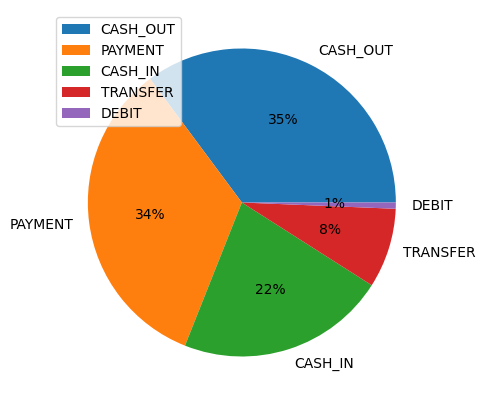

In [8]:
#Quantidade de transações por tipo de pagamento
import matplotlib.pyplot as plt
import seaborn as sns

type = df['type'].value_counts()
transaction = type.index
count = type.values

plt.figure(figsize=(5,5))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Quantidade de tipo de pagamento em porcentagem
data = {
    'type': ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
    'count': [2237500, 2151495, 1399284, 532909, 41432]
}

df1 = pd.DataFrame(data)

# Calcular o total de transações
total = df1['count'].sum()

# Calcular a porcentagem
df1['percentage'] = (df1['count'] / total) * 100

# Exibir o DataFrame com as porcentagens
print(df1)

       type    count  percentage
0  CASH_OUT  2237500   35.166331
1   PAYMENT  2151495   33.814608
2   CASH_IN  1399284   21.992261
3  TRANSFER   532909    8.375622
4     DEBIT    41432    0.651178


In [ ]:
#tipos de pagamentos flegados como fraude
df[df["isFraud"] == 1]["type"].value_counts()

,count
type,
CASH_OUT,4116
TRANSFER,4097


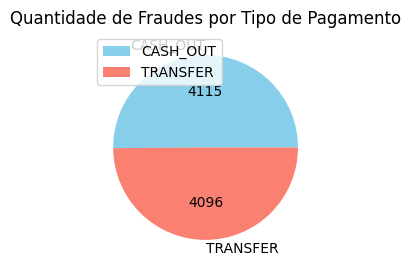

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Exemplo: supondo que você já tenha o DataFrame 'df' carregado
# Filtrar as transações fraudulentas e contar os tipos de pagamento
fraud_payment_types = df[df["isFraud"] == 1]["type"].value_counts()

# Função para exibir valores absolutos no gráfico de pizza
def absolute_value(val):
    absolute = int(val/100.*fraud_payment_types.sum())  # Calcula o valor absoluto correspondente à porcentagem
    return f'{absolute}'

# Criar o gráfico de pizza para mostrar os valores absolutos
plt.figure(figsize=(3, 3))

# Usar os valores e os índices de 'fraud_payment_types' para o gráfico de pizza
plt.pie(fraud_payment_types, labels=fraud_payment_types.index, autopct=absolute_value, colors=['skyblue', 'salmon', 'lightgreen', 'orange', 'purple'])

# Adicionar legenda
plt.legend(loc='upper left')

# Adicionar título
plt.title('Quantidade de Fraudes por Tipo de Pagamento')

# Exibir o gráfico
plt.show()


<Figure size 700x400 with 0 Axes>

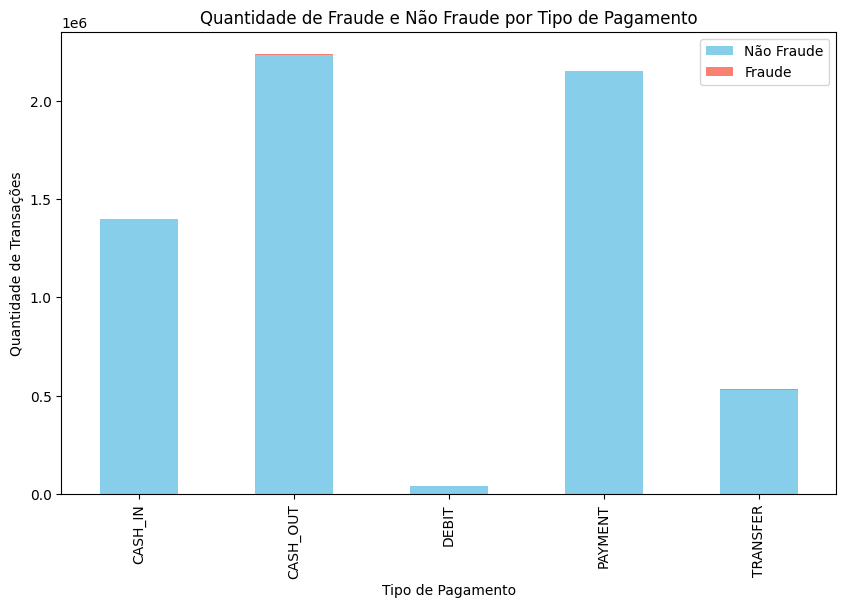

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por 'type' e 'isFraud' e contar as ocorrências
fraud_counts = df.groupby(['type', 'isFraud']).size().unstack()

# Configurar o gráfico de barras
plt.figure(figsize=(7, 4))

# Criar o gráfico de barras empilhadas para mostrar fraudes e não fraudes
fraud_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Adicionar título e rótulos
plt.title('Quantidade de Fraude e Não Fraude por Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Quantidade de Transações')
plt.legend(['Não Fraude', 'Fraude'], loc='upper right')

# Exibir o gráfico
plt.show()


In [ ]:
# Percentuais de Fraudes e não Fraudes
Fraud_Percentage = df['isFraud'].value_counts(normalize=True)[1]*100
NoFraud_Percentage = df['isFraud'].value_counts(normalize=True)[0]*100
print(f'Fraud Percentage: {Fraud_Percentage:.2f}%')
print(f'Fraud Percentage: {NoFraud_Percentage:.2f}%')

Fraud Percentage: 0.13%
Fraud Percentage: 99.87%


In [ ]:
# Agrupar por 'nameDest' para contar o número de transações e somar os valores
result = df.groupby('nameDest').agg(
    trans_count=('nameDest', 'size'),  # Quantidade de transações
    total_amount=('amount', 'sum')     # Soma dos valores de 'amount'
).reset_index()

# Exibir o resultado
print(result)

            nameDest  trans_count  total_amount
0        C1000004082            6    2259324.39
1        C1000004940           13    2534004.05
2        C1000013769           13    6204082.94
3         C100001587            9    1404313.66
4        C1000015936           16    2267960.19
...              ...          ...           ...
2722357   M999998692            1       3156.54
2722358    M99999900            1      34263.71
2722359   M999999089            1      16725.52
2722360   M999999543            1      19365.23
2722361   M999999784            1       2327.35

[2722362 rows x 3 columns]


In [ ]:
#Valores máximos
df_sort = df.sort_values(by='amount', ascending=False)
df_sort.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9.595980e+03,9.245511e+07,0,0
4060598,300,TRANSFER,73823490.36,C2127282686,0.0,0.0,C753026640,9.362401e+07,1.674475e+08,0,0
4146397,303,TRANSFER,71172480.42,C2044643633,0.0,0.0,C84111522,1.134615e+08,1.846340e+08,0,0
3946920,286,TRANSFER,69886731.30,C1425667947,0.0,0.0,C167875008,1.515387e+08,2.214254e+08,0,0
3911956,284,TRANSFER,69337316.27,C1584456031,0.0,0.0,C1472140329,1.130072e+08,1.823446e+08,0,0


In [ ]:
#Valores mínimos
df_sorted = df.sort_values(by='amount', ascending=True)
df_sorted.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6362461,730,CASH_OUT,0.0,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
6362463,730,CASH_OUT,0.0,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1,0


In [ ]:
#Contas esvaziadas
df_vazia = (df['oldbalanceOrg'] > 0) & (df['newbalanceOrig'] == 0)

# Contar quantas linhas atendem a essa condição
df_vazia.value_counts()


,count
False,4842039
True,1520581


In [ ]:
#Valor médio dos valores fraudulentos
media_fraude = df[df['isFraud'] == 1]['amount'].mean()

# Exibir o resultado
print(f"Média das transações fraudulentas:", media_fraude)

Média das transações fraudulentas: 1467967.299140387


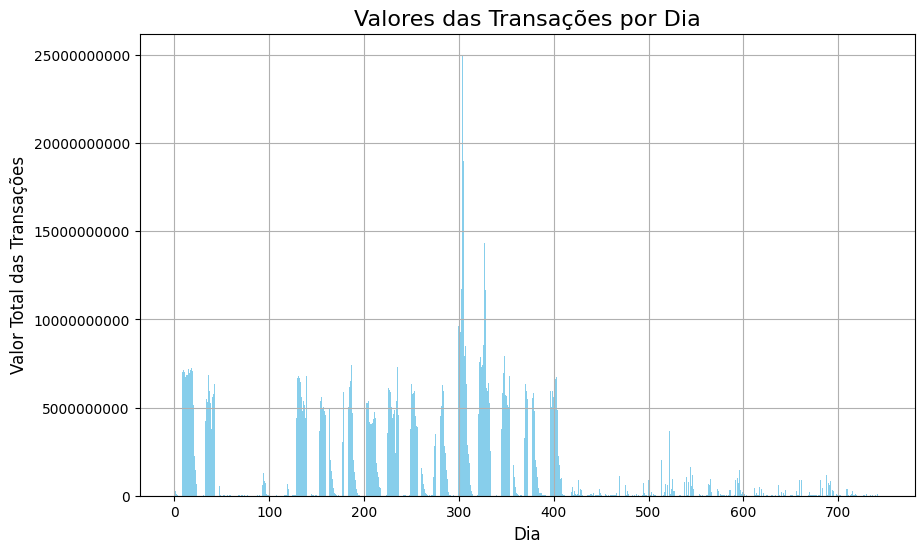

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que os valores da coluna 'amount' sejam numéricos
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Assumindo que a coluna 'step' já representa dias (ou etapas que podem ser agrupadas)
df['day'] = df['step']  # Usar o valor de 'step' como 'day' diretamente

# Agrupar os valores das transações ('amount') por dia
transactions_per_day = df.groupby('day')['amount'].sum()

# Criar o gráfico de barras para comparar os valores das transações por dia
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_day.index, transactions_per_day.values, color='skyblue')

# Adicionar rótulos e título
plt.title('Valores das Transações por Dia', fontsize=16)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Valor Total das Transações', fontsize=12)

# Formatando o eixo y para garantir que os valores decimais sejam exibidos corretamente
plt.ticklabel_format(style='plain', axis='y')  # Remove notação científica
plt.grid(True)

# Exibir o gráfico
plt.show()
